In [135]:
%matplotlib inline

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from typing import List

In [139]:
glucose1 = pd.read_csv('sample_data/glucose_data_1.csv', header=None)
glucose2 = pd.read_csv('sample_data/glucose_data_2.csv', header=None)

# Graph comparision

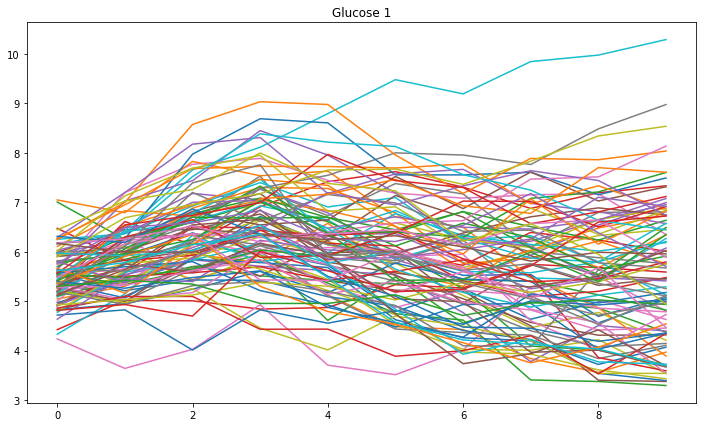

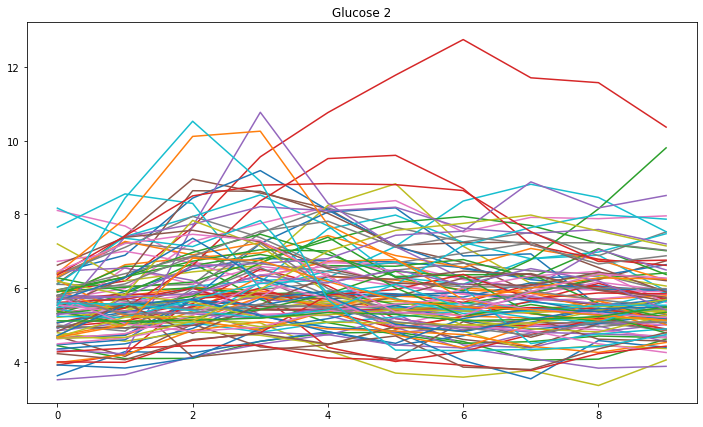

In [140]:
glucose1.T.plot(figsize=(12,7), legend=False, title='Glucose 1')
glucose2.T.plot(figsize=(12,7), legend=False, title='Glucose 2')

With this view of the graph we can't really see anything.. Let's try something else.

# Test of ranges

In [141]:
ranges1 = []
ranges2 = []

def calculate_ranges(ranges: List[float], dataframe: pd.DataFrame):
  for i, row in dataframe.iterrows():
    ranges.append(row.max() - row.min())

calculate_ranges(ranges1, glucose1)
calculate_ranges(ranges2, glucose2)

np_ranges1 = np.array(ranges1)
np_ranges2 = np.array(ranges2)

print("Mean:")
print(np.mean(np_ranges1))
print(np.mean(np_ranges2))

print("\n")
print("Median:")
print(np.median(np_ranges1))
print(np.median(np_ranges2))

print('\n')
print('Comparision between mean and median:')
print(np.mean(np_ranges1) / np.median(np_ranges1))
print(np.mean(np_ranges2) / np.median(np_ranges2))

print('\n')
print('Std dev:')
print(np.std(np_ranges1))
print(np.std(np_ranges2))

Mean:
2.0169391007395854
1.9031314412608231


Median:
1.9499182379424562
1.635509967803955


Comparision between mean and median:
1.034371114384698
1.1636318204872886


Std dev:
0.7435057412533074
1.246607979898436


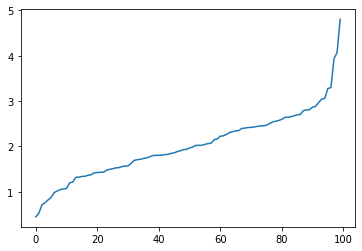

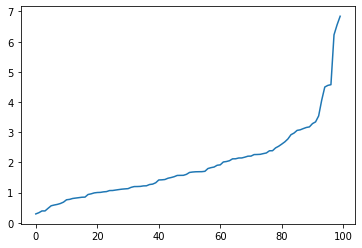

In one graph:


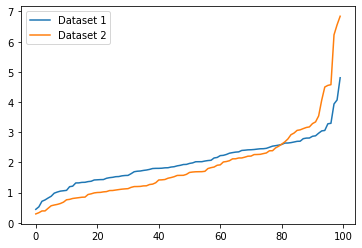

In [142]:
sorted_ranges1 = np.sort(np_ranges1)
sorted_ranges2 = np.sort(np_ranges2)

plt.plot(sorted_ranges1)
plt.show()
plt.plot(sorted_ranges2)
plt.show()

print("In one graph:")
plt.plot(sorted_ranges1, label='Dataset 1')
plt.plot(sorted_ranges2, label='Dataset 2')
plt.legend()
plt.show()

# Testing starting glucose values of both datasets

In [143]:
starting1 = np.array(glucose1.T.iloc[0])
starting2 = np.array(glucose2.T.iloc[0])

print('Mean:')
print(np.mean(starting1))
print(np.mean(starting2))

print('\n')
print('Median:')
print(np.median(starting1))
print(np.median(starting2))

print('\n')
print('range:')
print(np.max(starting1) - np.min(starting1))
print(np.max(starting2) - np.min(starting2))

print('\n')
print('Std dev:')
print(np.std(starting1))
print(np.std(starting2))

Mean:
5.491626709262841
5.411062490032903


Median:
5.434076124554334
5.411418965791718


range:
2.81077762033945
4.658610820770264


Std dev:
0.5206311220947519
0.8534817601891859


# Standart deviations of data

In [144]:
def calculate_stddevs(glucose_data: pd.DataFrame) -> List[float]:
  result = []
  for i, row in glucose_data.iterrows():
    result.append(np.std(row))

  return result

stddevs1 = calculate_stddevs(glucose1)
stddevs2 = calculate_stddevs(glucose2)

print("Average std. dev.:")
print(np.mean(stddevs1))
print(np.mean(stddevs2))

print('\n')
print("Median std. dev.:")
print(np.median(stddevs1))
print(np.median(stddevs2))

print('\n')
print("Std dev of std. devs...:")
print(np.std(stddevs1))
print(np.std(stddevs2))

Average std. dev.:
0.6310118801467098
0.6131643462056474


Median std. dev.:
0.6117825502675638
0.515416629536104


Std dev of std. devs...:
0.24839222907115208
0.4150165957902537


*Here I started to think that the second dataset is real and first generated*

# Changes between rising and lowering

In [145]:
def count_changes(dataset: pd.DataFrame) -> List[int]:
  result: List[int] = []
  for i, row in dataset.iterrows():
    rising: bool = row[0] < row[1]
    current_changes: int = 0
    for j in range(1,9):
      newrising: bool = row[j] < row[j+1]
      if newrising != rising: current_changes += 1
      rising = newrising
    result.append(current_changes)

  return result

changes_glucose1 = count_changes(glucose1)
changes_glucose2 = count_changes(glucose2)

print(changes_glucose1)
print(changes_glucose2)

print('\n')
print('Total number of changes:')
print(np.sum(changes_glucose1))
print(np.sum(changes_glucose2))

print('\n')
print('Mean of n° of changes:')
print(np.mean(changes_glucose1))
print(np.mean(changes_glucose2))

print('\n')
print('Median of n° of changes:')
print(np.median(changes_glucose1))
print(np.median(changes_glucose2))

print('\n')
print('Std dev of n° of changes:')
print(np.std(changes_glucose1))
print(np.std(changes_glucose2))

[4, 4, 5, 4, 3, 2, 3, 4, 3, 4, 4, 6, 2, 5, 2, 8, 4, 3, 5, 3, 3, 4, 2, 5, 4, 1, 6, 3, 3, 2, 2, 3, 3, 2, 2, 3, 5, 2, 4, 4, 4, 4, 4, 4, 5, 3, 3, 2, 5, 4, 4, 4, 4, 4, 3, 6, 4, 4, 1, 4, 4, 5, 5, 6, 4, 3, 2, 5, 6, 2, 8, 4, 6, 4, 4, 5, 4, 4, 4, 1, 3, 4, 4, 2, 3, 3, 5, 4, 2, 4, 5, 2, 5, 4, 3, 6, 5, 4, 3, 1]
[1, 4, 3, 1, 2, 2, 2, 2, 5, 3, 5, 3, 3, 3, 3, 3, 4, 5, 4, 1, 2, 1, 5, 7, 2, 5, 5, 4, 4, 3, 4, 3, 5, 3, 4, 4, 5, 1, 4, 3, 3, 4, 1, 3, 3, 3, 2, 3, 6, 4, 3, 2, 2, 1, 4, 4, 1, 5, 6, 4, 3, 5, 3, 5, 5, 4, 4, 1, 2, 4, 6, 4, 3, 4, 5, 3, 3, 4, 3, 3, 3, 3, 3, 2, 3, 5, 2, 4, 5, 3, 2, 1, 3, 2, 5, 5, 3, 4, 1, 2]


Total number of changes:
375
332


Mean of n° of changes:
3.75
3.32


Median of n° of changes:
4.0
3.0


Std dev of n° of changes:
1.3592277219068187
1.3481839637082174


The maximum number of changes is 8. We can see, that in first dataset there are 2 such cases, and in second one there are none. Thus I think, that this is possible only by generating values randomly, not in real life cases (if yes, the possibility of it happening twice in 100 cases is low).

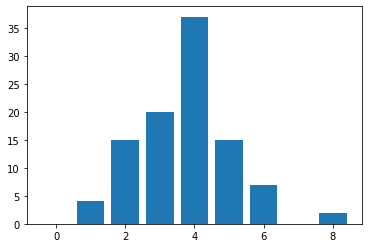

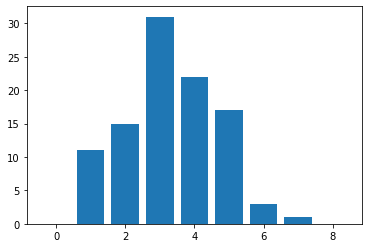

'\nprint("In one graph:")\nplt.bar(list(sorted_changes_glucose1.keys()), list(sorted_changes_glucose1.values()), label=\'Dataset 1\')\nplt.bar(list(sorted_changes_glucose2.keys()), list(sorted_changes_glucose2.values()), label=\'Dataset 2\')\nplt.legend()\nplt.show()\n'

In [146]:
sorted_changes_glucose1 = np.sort(changes_glucose1)
sorted_changes_glucose2 = np.sort(changes_glucose2)

unique1, counts1 = np.unique(changes_glucose1, return_counts=True)
sorted_changes_glucose1 = dict(zip(unique1, counts1))
unique2, counts2 = np.unique(changes_glucose2, return_counts=True)
sorted_changes_glucose2 = dict(zip(unique2, counts2))

for i in range(0,9):
  if i not in sorted_changes_glucose1: sorted_changes_glucose1[i] = 0
  if i not in sorted_changes_glucose2: sorted_changes_glucose2[i] = 0

plt.bar(list(sorted_changes_glucose1.keys()), list(sorted_changes_glucose1.values()))
plt.show()
plt.bar(list(sorted_changes_glucose2.keys()), list(sorted_changes_glucose2.values()))
plt.show()

"""
print("In one graph:")
plt.bar(list(sorted_changes_glucose1.keys()), list(sorted_changes_glucose1.values()), label='Dataset 1')
plt.bar(list(sorted_changes_glucose2.keys()), list(sorted_changes_glucose2.values()), label='Dataset 2')
plt.legend()
plt.show()
"""

# Changes between glucose levels

My hypothesis is that standard deviation of relative changes between glucose levels will be lower in the generated dataset.

In [148]:
def calculate_relative_changes_std_dev(dataset: pd.DataFrame) -> List[float]:
  result: List[float] = []
  for i, row in dataset.iterrows():
    tmp_result: List[float] = []
    for j in range(0,9):
      if row[j] < row[j+1]:
        tmp_result.append(row[j+1]/row[j])
      else:
        tmp_result.append(row[j]/row[j+1])
    result.append(np.std(tmp_result))

  return result

rel_changes_std_1 = calculate_relative_changes_std_dev(glucose1)
rel_changes_std_2 = calculate_relative_changes_std_dev(glucose2)

print(rel_changes_std_1)
print(rel_changes_std_2)

print('\n')
print('Mean:')
print(np.mean(rel_changes_std_1))
print(np.mean(rel_changes_std_2))

print('\n')
print('Std dev:')
print(np.std(rel_changes_std_1))
print(np.std(rel_changes_std_2))

[0.051056669320660227, 0.04216351688828515, 0.08559362758110953, 0.06805688103909828, 0.08679084570465773, 0.051889825424921224, 0.08193810609551194, 0.05109909577023273, 0.03964871729450753, 0.05288720900645682, 0.052601116533001244, 0.05057625678690495, 0.10101135881177171, 0.04574287070640078, 0.031138160744108797, 0.06817290812093417, 0.09817979720189268, 0.08253426437330011, 0.06409370282351842, 0.03991052006223278, 0.03901664959682449, 0.07759421089629573, 0.07316853768453513, 0.031656333332436074, 0.055833278620301664, 0.09570429149579884, 0.08905693040676131, 0.03390882948133883, 0.03668379464809815, 0.05809380840121284, 0.07661862162474703, 0.05328730366969221, 0.02190232482295629, 0.055766294766362405, 0.06848908139699444, 0.04525120936383478, 0.04236012766221058, 0.05664878046666259, 0.03026316001041073, 0.0721327244943768, 0.04943443176475276, 0.042300297934167, 0.03523008091508397, 0.12131172658132207, 0.051652862844371664, 0.06344839984769246, 0.0890958689399789, 0.058070

This is where my hypothesis failed. But we can try that not with standart deviations, but also with mean.

In [149]:
def calculate_relative_changes_mean(dataset: pd.DataFrame) -> List[float]:
  result: List[float] = []
  for i, row in dataset.iterrows():
    tmp_result: List[float] = []
    for j in range(0,9):
      if row[j] < row[j+1]:
        tmp_result.append(row[j+1]/row[j])
      else:
        tmp_result.append(row[j]/row[j+1])
    result.append(np.mean(tmp_result))

  return result

rel_changes_mean_1 = calculate_relative_changes_mean(glucose1)
rel_changes_mean_2 = calculate_relative_changes_mean(glucose2)

print(rel_changes_mean_1)
print(rel_changes_mean_2)

print('\n')
print('Mean:')
print(np.mean(rel_changes_mean_1))
print(np.mean(rel_changes_mean_2))

print('\n')
print('Std dev:')
print(np.std(rel_changes_mean_1))
print(np.std(rel_changes_mean_2))

[1.087326038851596, 1.0988699203327081, 1.117148662734158, 1.0809570804567332, 1.097673393613379, 1.0818645693304498, 1.069021176310752, 1.094134392876147, 1.095498130585229, 1.0791869157190037, 1.0903972716325656, 1.1081641094627344, 1.0893741551179688, 1.0445307478400885, 1.0854720133846305, 1.08243630316682, 1.1692748058162972, 1.1000274291764158, 1.1027793026328245, 1.0894714924916142, 1.066202115822903, 1.108236793479377, 1.102712104351421, 1.0592437421266097, 1.087703799331237, 1.0886898083847454, 1.1340448493635602, 1.077442017774279, 1.0688543739245882, 1.081279981457369, 1.0889628380508618, 1.0770659579001973, 1.0349710723654288, 1.0697031731926994, 1.1002863041661746, 1.0808265300033872, 1.0583743602474895, 1.0810871649728904, 1.0619877121144035, 1.091645268893303, 1.0790730717287214, 1.0674958367154426, 1.0687816581177156, 1.100448037408256, 1.0581250634851094, 1.0899926083855591, 1.0949364504908088, 1.0780621256759906, 1.0965640031742356, 1.0629471995159823, 1.0875060308001

Here we can see, that the mean is very similar in both datasets, which may indicate, that changes in the algorithm were generated according to some average changes in real data. But we can also see, that the standart deviation is lower, close to 0, which shows that the means of relative changes are very similar in all of the 100 examples.

# Conclusion

After these tests I have concluded, that the second dataset is following very similar patterns in all of the 100 rows, also between them, and contains some anomalies that are not possible in real life. 

Thus, my opinion is that **the first dataset is real and the second one generated**. My opinion would be different, if the algorithm was completely random, then that would make more sense that the data is more diverse, but the algorithm tries to generate similar-to-real data, so it should follow some patterns and not just give random numbers.